In [1]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

True

In [8]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-lite-preview-06-17",
    temperature=0,
    max_tokens=200,
)


In [10]:
llm.invoke("How is the weather in chennai today?")

AIMessage(content="I'm sorry, but I cannot provide real-time weather updates. My knowledge base is not connected to live weather feeds.\n\nTo get the most accurate and up-to-date weather information for Chennai, I recommend checking a reliable weather source such as:\n\n*   **Weather websites:** AccuWeather, The Weather Channel, BBC Weather, etc.\n*   **Weather apps:** Most smartphones have built-in weather apps.\n*   **News websites:** Many local and international news outlets provide weather forecasts.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--ba8ded9f-20e1-4e38-bffd-ef203bc6497b-0', usage_metadata={'input_tokens': 10, 'output_tokens': 106, 'total_tokens': 116, 'input_token_details': {'cache_read': 0}})

In [13]:
from langchain_core.tools import tool

@tool
def get_weather(location: str):
    """Call to get the current weather."""
    if location.lower() in ["chennai"]:
        return "It's 15 degrees Celsius and cloudy."
    else:
        return "It's 32 degrees Celsius and sunny."
    

@tool
def check_seating_availability(location: str, seating_type: str):
    """Call to check seating availability."""
    if location.lower() == "chennai" and seating_type.lower() == "outdoor":
        return "Yes, we still have seats available outdoors."
    elif location.lower() == "chennai" and seating_type.lower() == "indoor":
        return "Yes, we have indoor seating available."
    else:
        return "Sorry, seating information for this location is unavailable."

tools = [get_weather, check_seating_availability]


In [14]:
llm_with_tools = llm.bind_tools(tools)

In [15]:
result = llm_with_tools.invoke("How will the weather be in chennai today?")
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--81d90b35-401b-4453-8b26-aeb4770d320a-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '936bcc54-f8e8-4665-a59f-820c752b1efd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 108, 'output_tokens': 16, 'total_tokens': 124, 'input_token_details': {'cache_read': 0}})

In [16]:
result.tool_calls

[{'name': 'get_weather',
  'args': {'location': 'chennai'},
  'id': '936bcc54-f8e8-4665-a59f-820c752b1efd',
  'type': 'tool_call'}]

In [17]:
result = llm_with_tools.invoke(
    "How will the weather be in chennai today? Do you still have seats outdoor available?"
)
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'check_seating_availability', 'arguments': '{"seating_type": "outdoor", "location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--13e4aa35-d4c2-43dd-8311-49c4579d2c3d-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '45bb4952-57bd-4dc0-a46e-c399dcbe3708', 'type': 'tool_call'}, {'name': 'check_seating_availability', 'args': {'seating_type': 'outdoor', 'location': 'chennai'}, 'id': '7d25134f-b9e7-4337-8fef-e640762fb4af', 'type': 'tool_call'}], usage_metadata={'input_tokens': 116, 'output_tokens': 42, 'total_tokens': 158, 'input_token_details': {'cache_read': 0}})

In [18]:
result.tool_calls

[{'name': 'get_weather',
  'args': {'location': 'chennai'},
  'id': '45bb4952-57bd-4dc0-a46e-c399dcbe3708',
  'type': 'tool_call'},
 {'name': 'check_seating_availability',
  'args': {'seating_type': 'outdoor', 'location': 'chennai'},
  'id': '7d25134f-b9e7-4337-8fef-e640762fb4af',
  'type': 'tool_call'}]

In [19]:
from langchain_core.messages import HumanMessage, ToolMessage

messages = [
    HumanMessage(
        "How will the weather be in chennai today? Do you still have seats outdoor available?"
    )
]
llm_output = llm_with_tools.invoke(messages)
messages.append(llm_output)

In [20]:
messages

[HumanMessage(content='How will the weather be in chennai today? Do you still have seats outdoor available?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'check_seating_availability', 'arguments': '{"seating_type": "outdoor", "location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--ea60c042-8161-4e0d-afcb-0a15a05508af-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '4633c3a1-0489-4e59-ba54-d14b6b66d271', 'type': 'tool_call'}, {'name': 'check_seating_availability', 'args': {'seating_type': 'outdoor', 'location': 'chennai'}, 'id': 'e7266d91-aeb4-4a13-8c69-3dc4b9d82937', 'type': 'tool_call'}], usage_metadata={'input_tokens': 116, 'output_tokens': 42, 'total_tokens': 158, 'input_token_details': {'cache_read': 0}})]

In [21]:
tool_mapping = {
    "get_weather": get_weather,
    "check_seating_availability": check_seating_availability,
}

In [22]:
for tool_call in llm_output.tool_calls:
    tool = tool_mapping[tool_call["name"].lower()]
    tool_output = tool.invoke(tool_call["args"])
    messages.append(ToolMessage(tool_output, tool_call_id=tool_call["id"]))

In [23]:
messages

[HumanMessage(content='How will the weather be in chennai today? Do you still have seats outdoor available?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'check_seating_availability', 'arguments': '{"seating_type": "outdoor", "location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--ea60c042-8161-4e0d-afcb-0a15a05508af-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '4633c3a1-0489-4e59-ba54-d14b6b66d271', 'type': 'tool_call'}, {'name': 'check_seating_availability', 'args': {'seating_type': 'outdoor', 'location': 'chennai'}, 'id': 'e7266d91-aeb4-4a13-8c69-3dc4b9d82937', 'type': 'tool_call'}], usage_metadata={'input_tokens': 116, 'output_tokens': 42, 'total_tokens': 158, 'input_token_details': {'cache_read': 0}}),
 ToolMessage(conte

In [24]:
llm_with_tools.invoke(messages)

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


AIMessage(content='The weather in Chennai today will be 15 degrees Celsius and cloudy. Yes, we still have seats available outdoors.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite-preview-06-17', 'safety_ratings': []}, id='run--39c83a5b-7a73-45d9-9a10-4529a18681ae-0', usage_metadata={'input_tokens': 207, 'output_tokens': 24, 'total_tokens': 231, 'input_token_details': {'cache_read': 0}})

----

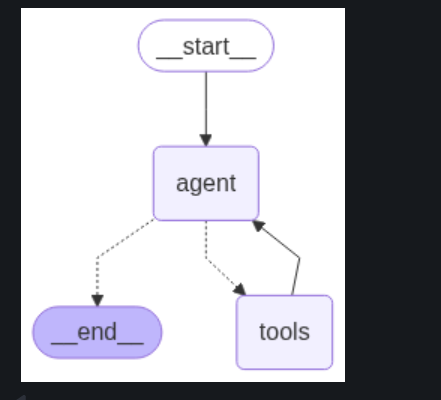

In [26]:
from langgraph.graph import END, START, StateGraph, MessagesState
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from typing import Literal

In [27]:
@tool
def get_weather(location: str):
    """Call to get the current weather."""
    if location.lower() in ["chennai"]:
        return "It's 15 degrees Celsius and cloudy."
    else:
        return "It's 32 degrees Celsius and sunny."

In [28]:
get_weather.invoke(input={"location": "chennai"})

"It's 15 degrees Celsius and cloudy."

In [29]:

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [30]:
tools = [get_weather]

model = llm.bind_tools(tools)

In [31]:
model.invoke("hello")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--9424b846-abff-4cb9-bda5-2b0d4f0f54df-0', usage_metadata={'input_tokens': 41, 'output_tokens': 9, 'total_tokens': 50, 'input_token_details': {'cache_read': 0}})

In [32]:
model.invoke("How is the weather in chennai?")

AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--9f03937c-b653-45c0-8ea7-3bc6b0c278b8-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '0d22ddbe-b338-46e6-8c84-60d74b43563c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 48, 'output_tokens': 16, 'total_tokens': 114, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 50}})

In [33]:
def call_model(state: MessagesState):
    messages = state["messages"]
    response = model.invoke(messages)
    return {"messages": [response]}


def should_continue(state: MessagesState) -> Literal["tools", END]:
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [40]:
workflow = StateGraph(MessagesState)
tool_node = ToolNode(tools)
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

In [41]:
workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    should_continue,
)
workflow.add_edge("tools", "agent")

In [42]:
graph = workflow.compile()

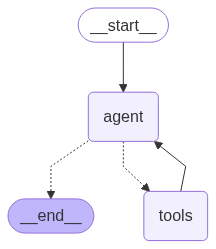

In [43]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [44]:
from langchain_core.messages import HumanMessage

messages1 = [HumanMessage(content="Hello, how are you?")]
messages2 = [HumanMessage(content="How is the weather in chennai?")]

In [45]:
graph.invoke({"messages": messages1})

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='1e48ad7d-351a-4e74-a655-5508147ac279'),
  AIMessage(content="Hello! I'm doing well, thank you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--9b825513-e13f-4066-99f0-c2380bd1c40a-0', usage_metadata={'input_tokens': 46, 'output_tokens': 18, 'total_tokens': 100, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 36}})]}

In [46]:
graph.invoke({"messages": messages2})

{'messages': [HumanMessage(content='How is the weather in chennai?', additional_kwargs={}, response_metadata={}, id='c9872239-94ef-4e78-a0bf-cae170a36756'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--178a2830-0f7a-42a0-9b2c-a8b46780a608-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '7ed10886-63fa-4bc4-89ba-5a3c0242cb23', 'type': 'tool_call'}], usage_metadata={'input_tokens': 48, 'output_tokens': 16, 'total_tokens': 114, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 50}}),
  ToolMessage(content="It's 15 degrees Celsius and cloudy.", name='get_weather', id='63cc96ee-865e-46ce-88c8-6c708d24e974', tool_call_id='7ed10886-63fa-4bc4-89ba-5a3c0242cb23'),
  AIMessage(content='Th

In [47]:
graph.invoke(
    {
        "messages": [
            HumanMessage(content="What would you recommend to do in that city than?")
        ]
    }
)

{'messages': [HumanMessage(content='What would you recommend to do in that city than?', additional_kwargs={}, response_metadata={}, id='417a96da-126a-49db-9b5e-92276d80c896'),
  AIMessage(content="Please tell me which city you are referring to! I'd be happy to recommend some activities there.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--ec070a63-4f1d-4694-ad4d-6313e832e013-0', usage_metadata={'input_tokens': 51, 'output_tokens': 21, 'total_tokens': 122, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 50}})]}


### Add Memory to chatbot

In [48]:

from langgraph.checkpoint.memory import MemorySaver

checkpointer = MemorySaver()

In [49]:
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    should_continue,
)
workflow.add_edge("tools", "agent")

graph = workflow.compile(checkpointer=checkpointer)

In [50]:
graph.invoke(
    {"messages": [HumanMessage(content="How is the weather in chennai?")]},
    config={"configurable": {"thread_id": 1}},
)

{'messages': [HumanMessage(content='How is the weather in chennai?', additional_kwargs={}, response_metadata={}, id='b712f581-1553-447b-afe9-34e50113d3b5'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--01e283bf-6885-4cba-9304-2cb9201ed9fc-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '3c2c8a32-27f9-45c7-af6a-5cf616055160', 'type': 'tool_call'}], usage_metadata={'input_tokens': 48, 'output_tokens': 16, 'total_tokens': 114, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 50}}),
  ToolMessage(content="It's 15 degrees Celsius and cloudy.", name='get_weather', id='93214059-fd66-4436-a5df-0795cb666da4', tool_call_id='3c2c8a32-27f9-45c7-af6a-5cf616055160'),
  AIMessage(content='Th

In [51]:
graph.invoke(
    {
        "messages": [
            HumanMessage(content="What would you recommend to do in that city than?")
        ]
    },
    config={"configurable": {"thread_id": 1}},
)

{'messages': [HumanMessage(content='How is the weather in chennai?', additional_kwargs={}, response_metadata={}, id='b712f581-1553-447b-afe9-34e50113d3b5'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "chennai"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--01e283bf-6885-4cba-9304-2cb9201ed9fc-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'chennai'}, 'id': '3c2c8a32-27f9-45c7-af6a-5cf616055160', 'type': 'tool_call'}], usage_metadata={'input_tokens': 48, 'output_tokens': 16, 'total_tokens': 114, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 50}}),
  ToolMessage(content="It's 15 degrees Celsius and cloudy.", name='get_weather', id='93214059-fd66-4436-a5df-0795cb666da4', tool_call_id='3c2c8a32-27f9-45c7-af6a-5cf616055160'),
  AIMessage(content='Th